In [21]:
import numpy as np
import matplotlib
import emcee
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython

# esthetic definitions for the plots
font = {'size'   : 15.4, 'family':'sans-serif'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.rcParams['legend.fontsize']='small' 
plt.rcParams["figure.figsize"] = [8.0,6.0]
plt.rcParams.update({ "text.usetex": True,
                      "font.family": "sans-serif"})




In [22]:
filenames = '/global/cfs/projectdirs/desi/users/sadiram/KP5_proyect/Abacus_LRG/FullModeling/Chains/Reescaled_1/AbacusExtended_ns_0.8_AP_NN_smax130.0_smin22.0_1.h5'



In [23]:
import emcee.backends
import numpy as np

labels = [r'$\omega_{cdm}$',   r'$\omega_{b}$',      r'$h$',r'$\log(10^{10}A_s)$', r'$n_s$','$\sigma^{eff}$', r'$b_1$', r'$B_2$', r'$c_1$', r'$b_S$']

sampler = emcee.backends.HDFBackend(filenames)


tau = sampler.get_autocorr_time(quiet=True)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))

samples = sampler.get_chain(discard=burnin, flat=True, thin=thin)
log_prob_samples = sampler.get_log_prob(discard=burnin, flat=True, thin=thin)
log_prior_samples = sampler.get_blobs(discard=burnin, flat=True, thin=thin)


N/50 = 166;
tau: [249.51803196 228.39831203 226.39930569 339.01966795 223.9253368
 345.88700929 376.95108532 326.75134983 249.65827964 511.19131691]


In [25]:

chain0 = MCSamples(samples = samples, names = labels)


samples0 = chain0.copy(settings={'mult_bias_correction_order':1,'smooth_scale_2D':0.7, 
                                       'smooth_scale_1D':0.7})

samples0.updateSettings({'contours': [0.68, 0.95, 0.99]})



Removed no burn in


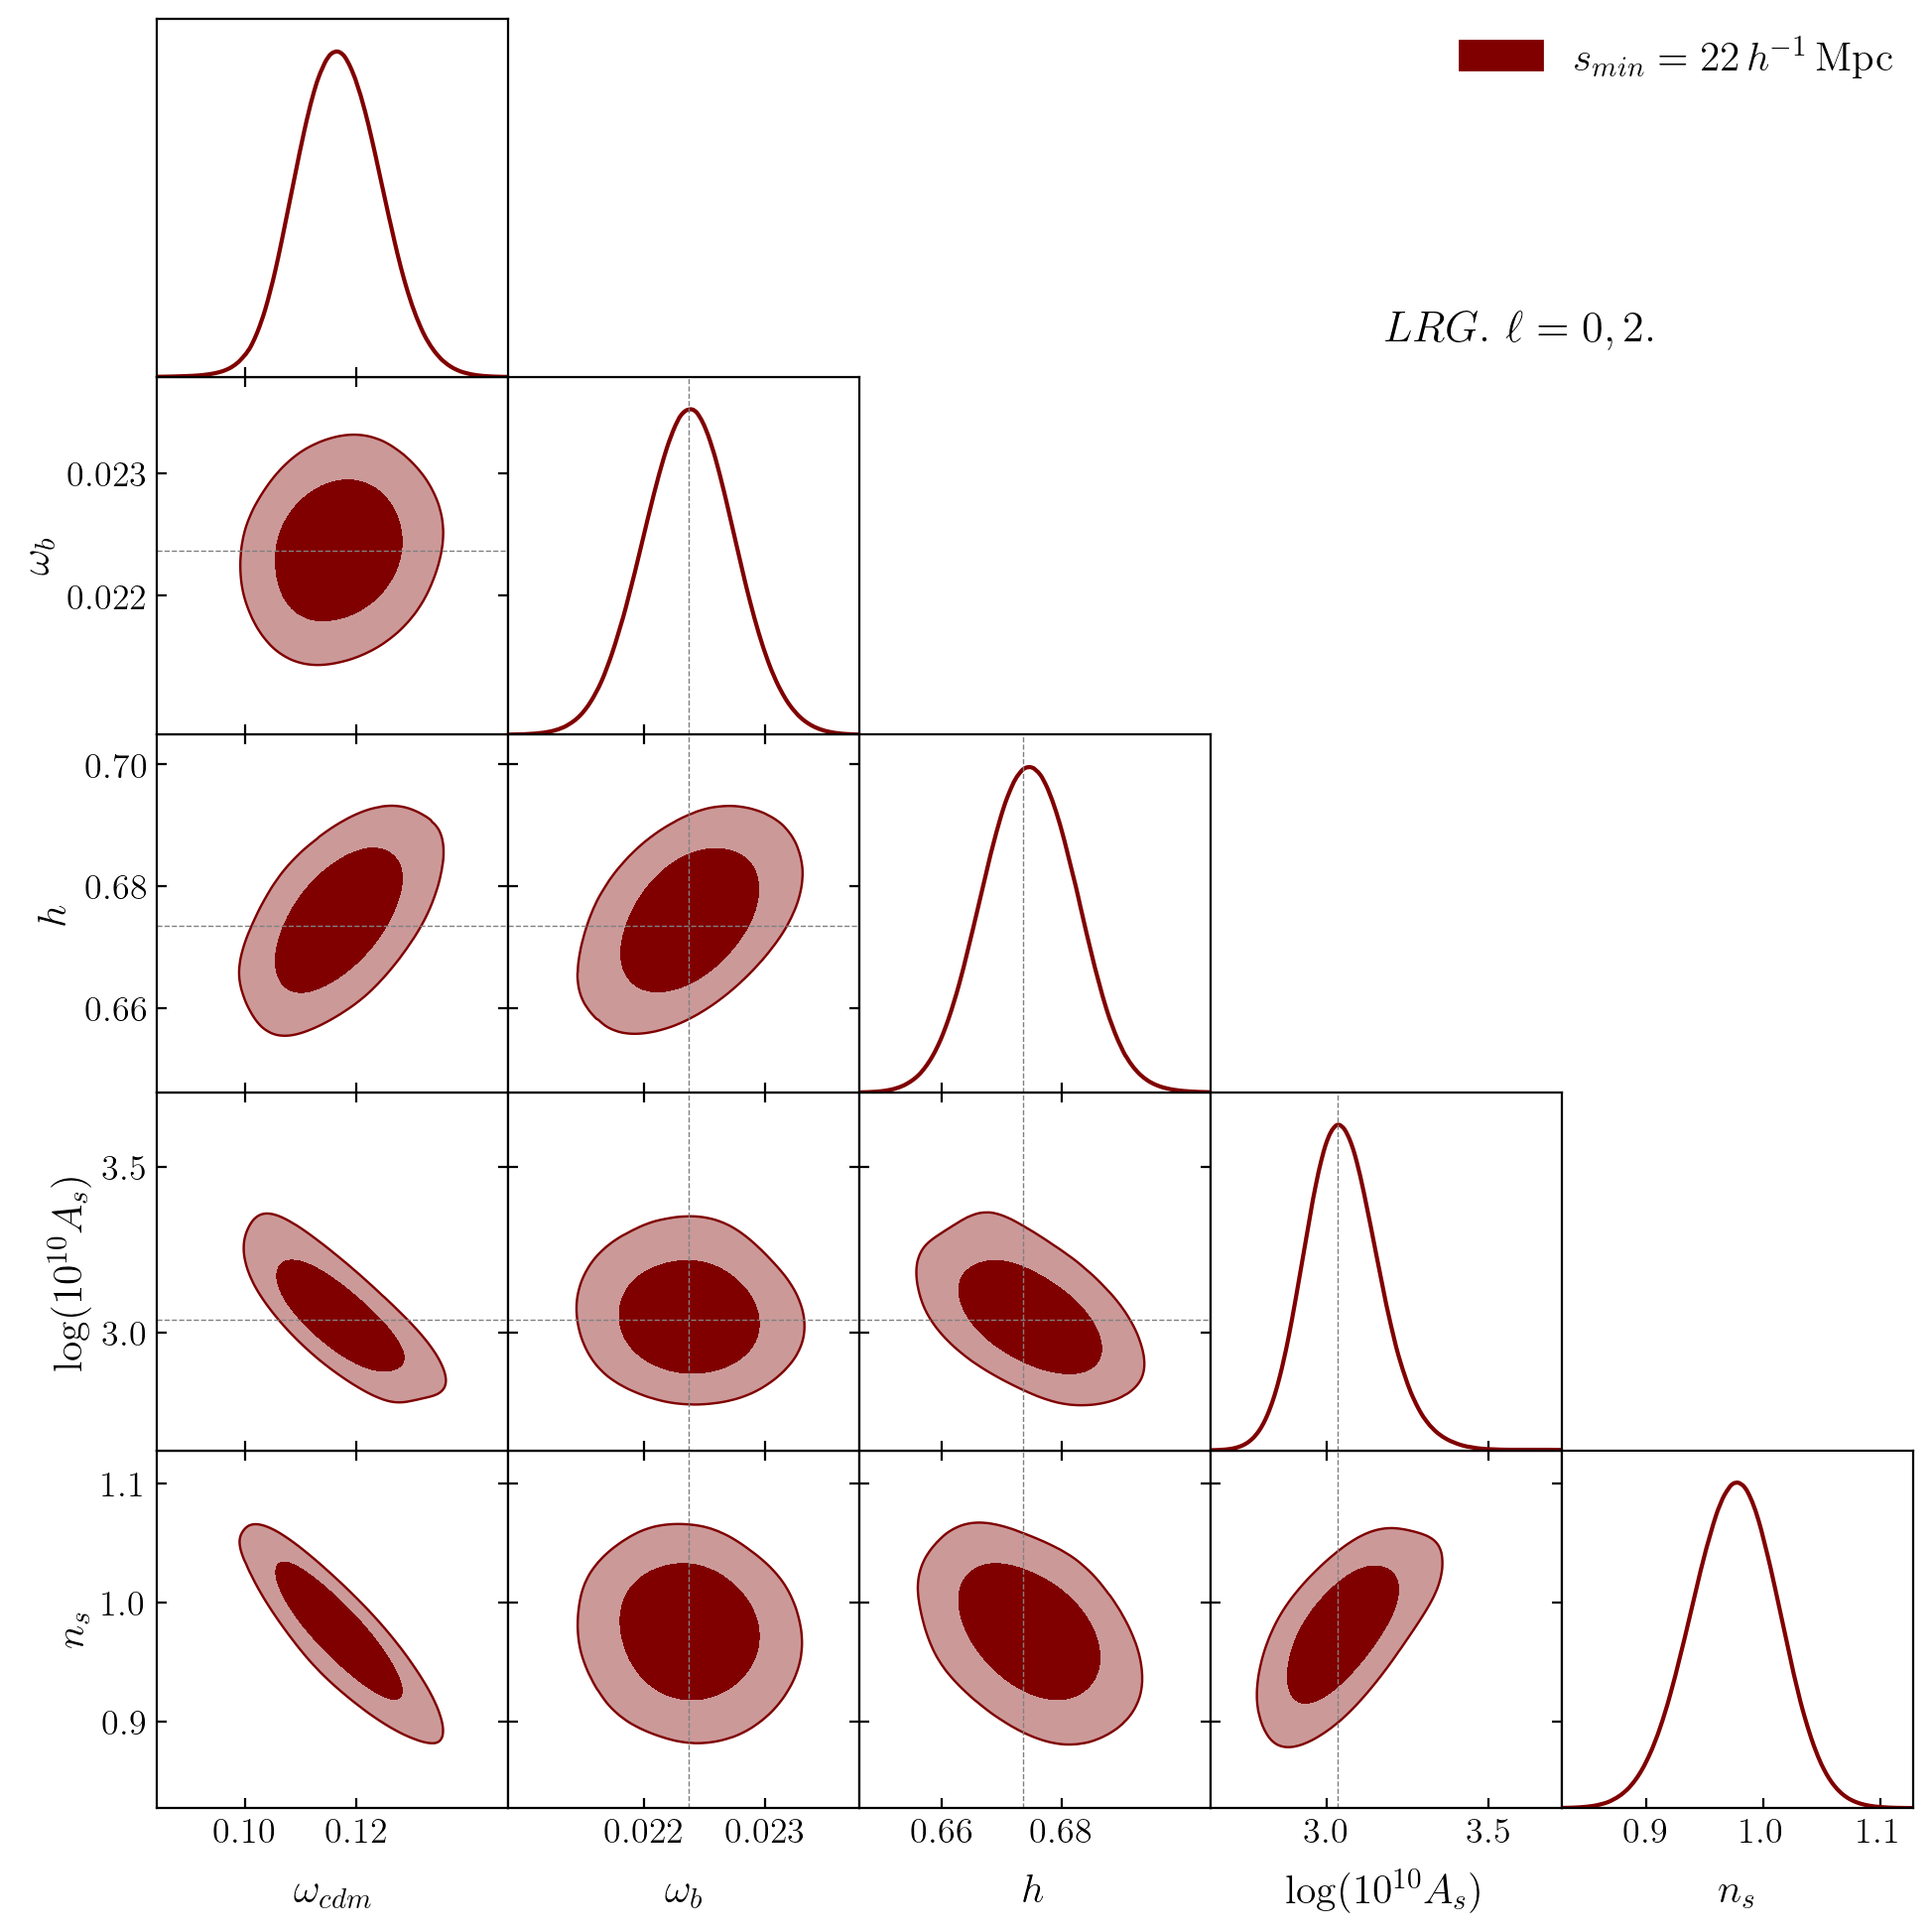

In [29]:
# Customized triangle plot
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4
g.settings.legend_fontsize = 18
g.settings.axes_labelsize = 18
g.settings.axes_fontsize = 16



g.settings.alpha_factor_contour_lines=1
logAs=np.log((2.0830e-9)*(10**(10)))
# Triangle plot
g.triangle_plot([ samples0], 
                [r'$\omega_{cdm}$',   r'$\omega_{b}$',      r'$h$',r'$\log(10^{10}A_s)$', r'$n_s$'],
                filled=[True], 
                contour_ls = ['-'], 
                contour_lws = [1.5],
                contour_colors=['maroon'],
                legend_labels=[r'$s_{min}=22  \, h^{-1}\,\textrm{Mpc}$'], 
                legend_loc='upper right', 
                markers={'$\Omega_{m}$': 0.3151918679932973, 
                          r'$\omega_{b}$':0.02237, 
                         r'$h$': 0.6736, 
                         r'$\log(10^{10}A_s)$':logAs,
                        r'$n_{s}$':0.9649},
               # marker_lw={3,2,1,0},  # Set marker size here
                line_args=[{'lw':2.5, 'color': 'maroon', 'ls': '-.'}])

plt.suptitle(r'$LRG. \,\, \ell=0,2. $',
             fontsize = 16, x = 0.780, y = 0.83); 


plt.savefig('triangle_fullshape_lrg_extended_ns_test.pdf', bbox_inches='tight')




In [28]:
print(samples0.getTable(limit=1).tableTex())

\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\omega_{cdm}$ } & $0.1168\pm 0.0073          $\\

{\boldmath$\omega_{b}$   } & $0.02237\pm 0.00037        $\\

{\boldmath$h$            } & $0.6746\pm 0.0076          $\\

{\boldmath$\log(10^{10}A_s)$} & $3.05^{+0.10}_{-0.12}      $\\

{\boldmath$n_s$          } & $0.975\pm 0.037            $\\

{\boldmath$\sigma^{eff}$ } & $11.4^{+9.7}_{-7.6}        $\\

{\boldmath$b_1$          } & $0.98^{+0.13}_{-0.11}      $\\

{\boldmath$B_2$          } & $0.10\pm 0.72              $\\

{\boldmath$c_1$          } & $-10\pm 19                 $\\

{\boldmath$b_S$          } & $-0.4\pm 2.3               $\\
\hline
\end{tabular}
